In [1]:
#Paths to the images
intro_images_path='../dataset_part1/Images/Intro_images/'
edge_images_path='../dataset_part1/Images/Edge_images/'
seg_images_path='../dataset_part1/Images/Seg_images/'
feature_images_path='../dataset_part1/Images/Feature_images/'
output_path='../dataset_part1/Images/Outputs/'
print('Image paths ....')

Image paths ....


# COMPUTER VISION I

**Master in Artificial Intelligence, USC, UDC, UVigo**

Academic year 2023/24

### EXERCISE

Transform the image torre_hercules_1.jpg to get a view of the same scene as if it were captured from the same point of view as torre_hercules_2.jpg

1371 1055 1040 778


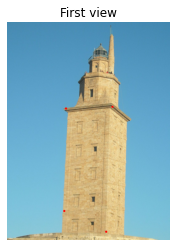

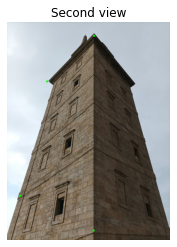

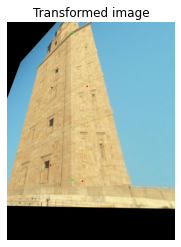

H= [[ 3.98639016e-01 -1.89702628e-01  8.52875865e+01]
 [-6.38541873e-01  2.52672164e-01  2.51867501e+02]
 [-5.58818747e-04 -5.31946983e-04  1.00000000e+00]]


In [2]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 

# Read first view 
im1 = cv2.imread(intro_images_path+'torre_hercules_1.jpg',  cv2.IMREAD_COLOR) 

# Read second view 
im2 = cv2.imread(intro_images_path+'torre_hercules_2.jpg', cv2.IMREAD_COLOR) 

#Change the image from BGR to RGB
im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB) 
im2=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) 

#Images shapes
height1, width1, _ = im1.shape 
height2, width2, _ = im2.shape 

#Resize the images to have the same dimensions
im1_1=cv2.resize(im1,(width2,height2))

print(height1, width1, height2, width2)

# Location of reference points
points1 = np.zeros((4, 2), dtype=np.float32) 
points2 = np.zeros((4, 2), dtype=np.float32) 

#INSERT HERE THE COORDINATES YOU HAVE WROTE DOWN 
#CHANGING THE CURRENT VALUES!!
points1[0, :] = [281,412]
points1[1, :] = [503,404]
points1[2, :] = [273,901]
points1[3, :] = [473,1000]

points2[0, :] = [191,283]
points2[1, :] = [415,65]
points2[2, :] = [63,829]
points2[3, :] = [413,994]


im1c=im1_1.copy()
im2c=im2.copy()


#Circle the points selected
for pt in points1:
    cv2.circle(im1c, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(im2c, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)


#Show the images with the circles    
plt.imshow(im1c), plt.title("First view")
plt.axis('off')
plt.show() 
plt.imshow(im2c), plt.title("Second view")
plt.axis('off')
plt.show()


# Find homography 
h, mask = cv2.findHomography(points1, points2, cv2.RANSAC) 

# Use homography to align im1 with im2 

#Aligned image im1Reg, using a 3x3 transformation matrix 
imP = cv2.warpPerspective(im1_1, h, (1*width1 + 0*width2, 1*height1+ 0*height2)) 


#Circle the points in the new image
for pt in points1:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (255, 0, 0),-1)
for pt in points2:
    cv2.circle(imP, (int(pt[0]), int(pt[1])),5, (0, 255, 0),-1)

#Show the new image
plt.imshow(imP), plt.title("Transformed image")
plt.axis('off')
plt.show()

# Print estimated homography 
print('H= {}'.format(h)) 

By defining 4 points in each of the images we achieve, by calculating the homography, that one image seems to be taken from the point of view of the other. The final result could be better but for that we would have to adjust very carefully all the points used to calculate the homography so that they are perfectly aligned.